In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Files/server/ignite_new/')

In [ ]:
import torch
from utils import *
from PIL import Image
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [ ]:
### Data
# retina vessel dataset
# poznan university dataset
# sk forearms dataset

In [ ]:
from architectures.attention_unet_architectures import *
from architectures.encoders_unet_architectures import *
from architectures.base_unet_architecture import *

In [ ]:
# pre-trained model loading
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AttU_Net()   
model = model.to(device)
model_state_dict = torch.load("pretrained_models/AttU_Net_0.369.pth")
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [ ]:
# image load
main_path = '/content/drive/My Drive/Colab Files/server/dataset_90/'
val_img_fold = main_path + 'img/val/'

img = Image.open(val_img_fold + 'Image_m_17_low_2_on_146_13_l.png')
# trf = T.Compose([T.Resize(512), T.CenterCrop(512)])
# img = trf(img)
img = ToTensor()(img)

answ = model.forward(img.unsqueeze(0).to(device))
plt.imsave(main_path + 'inference_examples/ex_0', tensor2numpy(answ[0]), format = 'png')

In [ ]:
from PIL import Image
im = Image.open('/content/drive/My Drive/Colab Files/server/dataset_90/inference_examples/Sasha/Image_blured.jpg')
width, height = im.size   # Get dimensions

new_width = 512
new_height = 512

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))
im.save('/content/drive/My Drive/Colab Files/server/dataset_90/inference_examples/Sasha/Image_blured.png')

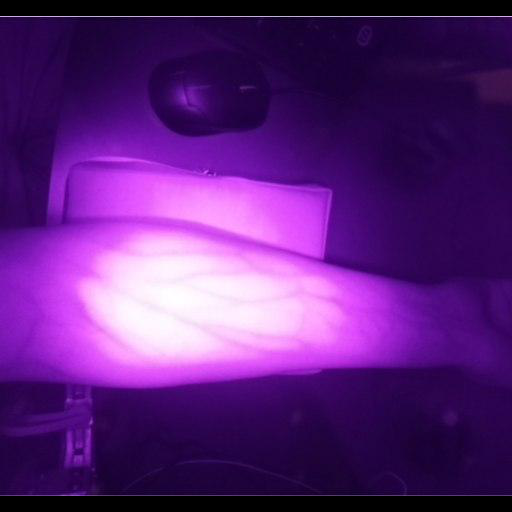

In [ ]:
im

In [ ]:
# Sasha's image

threshold = 0.4
main_path = '/content/drive/My Drive/Colab Files/server/dataset_90/'
val_img_fold = main_path + 'img/val/'

img = Image.open(main_path + 'inference_examples/Sasha/Image_blured.jpg')
trf = T.Compose([T.CenterCrop(512)])
img = trf(img)
img = ToTensor()(img)

answ = model.forward(img.unsqueeze(0).to(device))
plt.imsave(main_path + 'inference_examples/Sasha/Image_blured_mask.png', tensor2numpy((answ[0] - threshold).clamp_min(0).sign()))

In [ ]:
# Making a series of photos from the video fragment
# Draft for Raspberry Pi 4

import time
import picamera
import picamera.array
import cv2

import numpy as np
from datetime import datetime
#import matplotlib.pyplot as plt
import os

from PIL import Image
from torchvision import transforms as T

counter = -1
while 1:
    with picamera.PiCamera() as camera:
        #camera.start_preview()
        #time.sleep(2)
        with picamera.array.PiRGBArray(camera) as stream:
            #camera.capture(stream, format='bgr')
            camera.exposure_mode = 'off'
            #camera.exposure_compensation = 5
            camera.capture(stream, format='rgb', resize = (1280, 720)) # 'bgr'
            # At this point the image is available as stream.array
            img = stream.array

    # May be the conflict PIL vs OpenCV

    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.open(img) ###
    trf = T.Compose([T.Resize(512)])
    img = trf(img)
    
    mask = model.forward(img.unsqueeze(0).to(device))
    mask.show()
    
    #histog = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    
    # print(np.mean(img_gray), 'counter = ', counter)
    
    # median = cv2.medianBlur(img_gray, 5)
    
    # clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(9, 9))
    # clh = clahe.apply(img_gray)
    # img_gray = clh
    
    # median = clahe.apply(median)

    # cv2.imshow("Img", img)
    # cv2.imshow("Median", median)
    #cv2.imshow("Histogramm", clh)
    
### For saving   
    # if cv2.waitKey(1) == ord('q'):
    #     counter += 1
    #     date = datetime.today().strftime('%Y-%m-%d')
    #     print('s, a, h, r, illumination, current')
    #     #sex, age, hair, race, illum, current = ([i for i in input().split(' ')])
    #     sex, age, hair, race, illum, current = ([i for i in raw_input().split(' ')])
    #     sex = str(sex)
    #     age = str(age)
    #     hair = str(hair)
    #     race = str(race)
    #     illum = str(illum)
    #     current=str(current)
    #     if not os.path.isdir('/home/pi/Dataset/{date}'.format(date=date)):
    #         os.mkdir('/home/pi/Dataset/{date}'.format(date=date))
    #     cv2.imwrite('/home/pi/Dataset/{0}/Image_{1}_{2}_{3}_{4}_{5}_{6}_{7}.png'.format(
    #         date, sex, age, hair, race, illum, current, counter), img,
    #                 [int(cv2.IMWRITE_PNG_COMPRESSION),0])
    #     time.sleep(1)